In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.io import readsav
from helita.io import lp
from astropy.io import fits
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset
import matplotlib.font_manager as font_manager
from cycler import cycler
from matplotlib import rcParams
from skimage.exposure import match_histograms,is_low_contrast,rescale_intensity,equalize_hist
from skimage.util import img_as_ubyte,img_as_uint

In [2]:
dpath = '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/'
dpath_area = '/mn/stornext/d9/souvikb/K_means_results/savefiles/'
dpath_cluster_fits= '/mn/stornext/d9/souvikb/K_means_results/'
dpath_timesteps ='/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/calib_tseries/'
dpath_npz = '/mn/stornext/d9/souvikb/K_means_results/'

In [3]:
cluster_mask = fits.getdata(dpath_cluster_fits+'clusters_mask.fits',ext=0)# Reading the Cluster mask time series
hdrH_im =lp.getheader(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
hdrH_sp = lp.getheader(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris_sp.icube')
dimH_im = hdrH_im[0]
dimH_sp = hdrH_sp[0]
cubeH = lp.getdata(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
cubeH = np.reshape(cubeH,[dimH_im[0],dimH_im[1],dimH_sp[1],dimH_sp[0]])
time_sst = readsav(dpath_timesteps+'tseries_3950_2017-05-25T09:12:00_scans=0-424_calib.sav')
time_sst=time_sst['time']
hdr_Mag = lp.getheader(dpath+'Blos_6302_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
dim_Mag = hdr_Mag[0]
cube_Mag = lp.getdata(dpath+'Blos_6302_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
cube_Mag = np.reshape(cube_Mag,[dim_Mag[0],dim_Mag[1],dim_Mag[2]])
cube_Mag=np.swapaxes(cube_Mag,0,1)
h_alpha=np.swapaxes(cubeH,0,1)

hdrCa_im = lp.getheader(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
hdrCa_sp = lp.getheader(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris_sp.fcube')
dimCa_im = hdrCa_im[0]#Image dimensions.
dimCa_sp = hdrCa_sp[0]#La Palma SP cube dimensions.
cubeCa = lp.getdata(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
cubeCa = np.reshape(cubeCa,[dimCa_im[0],dimCa_im[1],dimCa_sp[1],dimCa_sp[0]])
Ca_k = np.swapaxes(cubeCa,0,1)

In [4]:
h_alpha.shape

(1641, 1518, 425, 32)

# RBEs

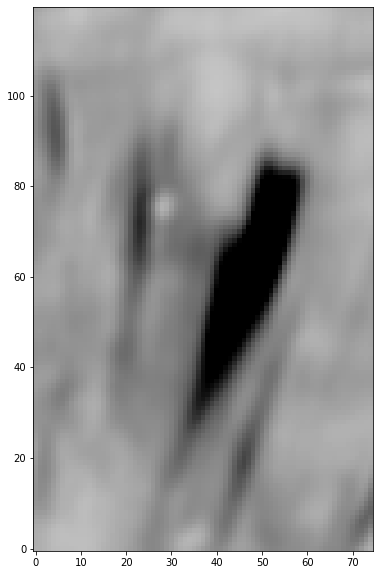

In [97]:
plt.figure(figsize=(10,10))
plt.imshow((h_alpha[380:500,525:600,114,8]),origin='lower',cmap='Greys_r',vmin=4000,vmax=7045)

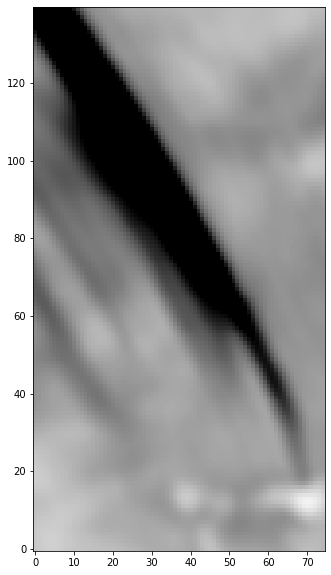

In [452]:
plt.figure(figsize=(10,10))
plt.imshow((h_alpha[340:480,280:355,258,7]),origin='lower',cmap='Greys_r',vmin=4000,vmax=7200)

In [57]:
h_alpha[320:440,300:375,252:260,7].min()

2419

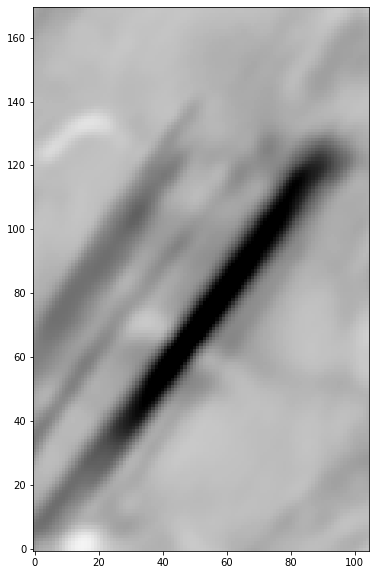

In [103]:
plt.figure(figsize=(10,10))
plt.imshow((h_alpha[1180:1350,855:960,325,8]),origin='lower',cmap='Greys_r',vmin=3500,vmax=7000)

In [101]:
(h_alpha[1180:1350,855:960,323:331,8]).min()

2945

# Classical RREs

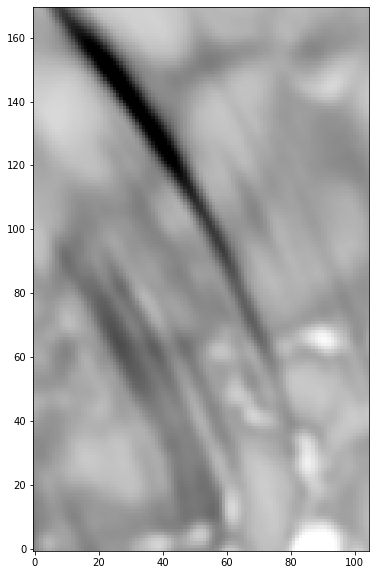

In [200]:
plt.figure(figsize=(10,10))
plt.imshow((h_alpha[290:460,260:365,253,26]),origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)

In [201]:
(h_alpha[290:460,260:365,249:255,26]).min()

3101

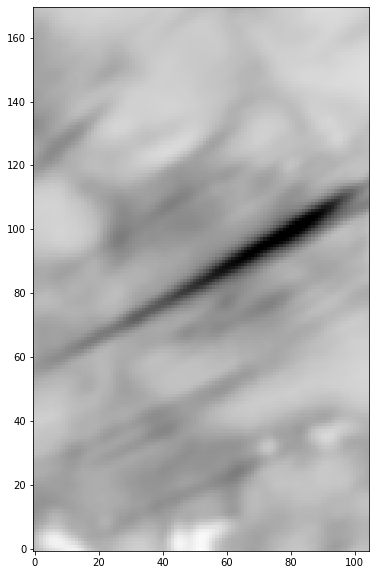

In [178]:
plt.figure(figsize=(10,10))
plt.imshow((h_alpha[190:360,690:795,268,26]),origin='lower',cmap='Greys_r',vmin=3500,vmax=7000)

# DRES

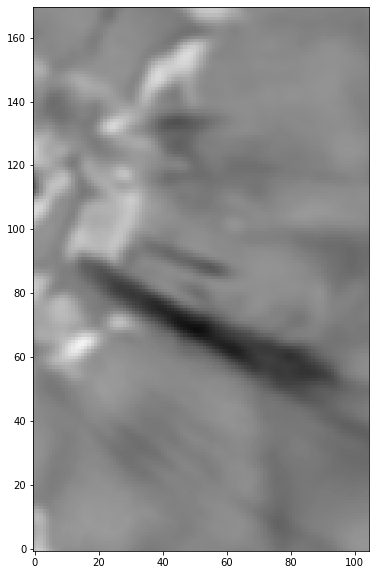

In [455]:
plt.figure(figsize=(10,10))
plt.imshow((h_alpha[850:1020,770:875,120,26]),origin='lower',cmap='gray',vmin=3500,vmax=7700)

# Rotated images 

## DRE-2

In [853]:
from scipy import ndimage
rot_dre2 = np.zeros((200,200,len(range(10))))
for scans in range(10):
    try_dre = ndimage.rotate(h_alpha[600:1200,400:1000,116+scans,26],60)
    rot_dre2[:,:,scans] = try_dre[200:400,400:600]

## DRE-1

In [967]:
rot_dre1 = np.zeros((200,200,len(range(14))))
for scans in range(14):
    try_dre = ndimage.rotate(h_alpha[50:650,400:1000,282+scans,26],-90)
    rot_dre1[:,:,scans] = try_dre[150:350,400:600]

(200, 200)

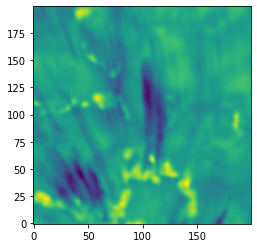

In [630]:
try_dre = ndimage.rotate(h_alpha[50:650,400:1000,292+scans,26],-90)
plt.imshow(try_dre[150:350,400:600],origin='lower')
try_dre[150:350,400:600].shape

## RRE-1

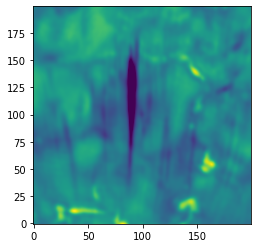

In [782]:
try_rre = ndimage.rotate(h_alpha[100:700,500:1100,268,26],-60)
plt.imshow(try_rre[200:400:,400:600],origin='lower',vmax=7000,vmin=4500)
#try_dre[150:350,400:600].shape

rot_rre1 = np.zeros((200,200,len(range(10))))
for scans in range(10):
    try_rre = ndimage.rotate(h_alpha[100:700,500:1100,263+scans,26],-60)
    rot_rre1[:,:,scans] = try_rre[200:400:,400:600]

## RRE-2

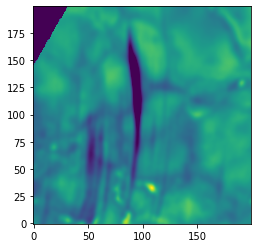

In [824]:
try_rre = ndimage.rotate(h_alpha[:600,200:800,253,26],30)
plt.imshow(try_rre[500:700,200:400],origin='lower',vmin=4500)

rot_rre2 = np.zeros((200,200,len(range(9))))
for scans in range(9):
    try_rre = ndimage.rotate(h_alpha[:600,200:800,248+scans,26],30)
    rot_rre2[:,:,scans] = try_rre[500:700,200:400]

## RBE-1

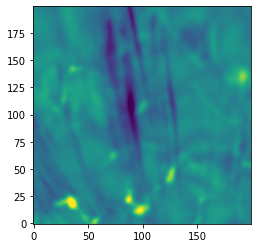

In [677]:
try_rbe=ndimage.rotate(h_alpha[1000:1600,600:1200,scans_rbe[-1],8],-45)
plt.imshow(try_rbe[275:475,360:560],origin='lower',vmax=7000,vmin=4500)

rot_rbe1 = np.zeros((200,200,len(range(10))))
for scans in range(10):
    try_rbe = ndimage.rotate(h_alpha[1000:1600,600:1200,322+scans,8],-45)
    rot_rbe1[:,:,scans] = try_rbe[275:475,360:560]

## RBE-2

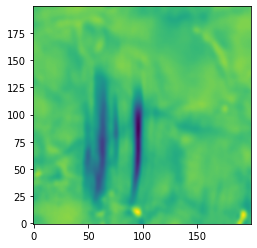

In [834]:
try_rbe = ndimage.rotate(h_alpha[200:800,100:700,252,7],30)
plt.imshow(try_rbe[300:500,200:400],origin='lower')

rot_rbe2 = np.zeros((200,200,len(range(10))))
for scans in range(10):
    try_rbe = ndimage.rotate(h_alpha[200:800,100:700,251+scans,7],30)
    rot_rbe2[:,:,scans] = try_rbe[300:500,200:400]

# x-t plots

In [310]:
x_t=np.mean(h_alpha[850:1020,770:875,110:125,26],axis=1)

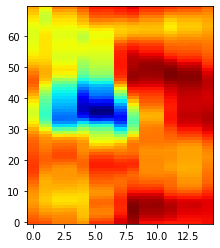

In [313]:
plt.imshow(x_t[100:],aspect=0.25,origin='lower',cmap='jet')

In [291]:
x_t.shape

(170, 9)

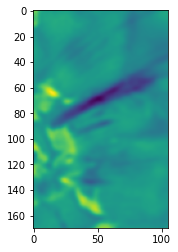

In [299]:
plt.imshow(h_alpha[850:1020,770:875,119,26])

In [304]:
x_t2=np.mean(h_alpha[100:240,630:735,282:295,26],axis=1)

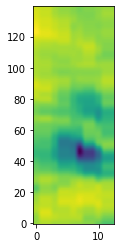

In [451]:
plt.imshow(x_t2,aspect=0.25,origin='lower')

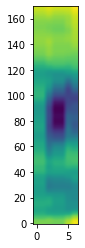

In [316]:
x_t3=np.mean(h_alpha[190:360,690:795,263:270,26],axis=1)
plt.imshow(x_t3,aspect=0.2,origin='lower')

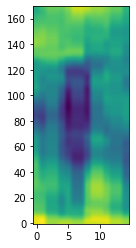

In [323]:
x_t4= np.mean(h_alpha[1180:1350,855:960,320:335,8],axis=1)
plt.imshow(x_t4,aspect=0.2,origin='lower')

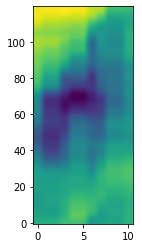

In [322]:
x_t5= np.mean(h_alpha[380:500,525:600,111:122,8],axis=1)
plt.imshow(x_t5,aspect=0.2,origin='lower')

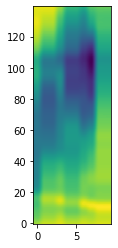

In [454]:
x_t6= np.mean(h_alpha[340:480,280:355,252:262,7],axis=1)
plt.imshow(x_t6,aspect=0.2,origin='lower')             

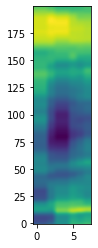

In [681]:
x_tnew_dre=np.mean(rot_rre1,axis=1)
plt.imshow(x_tnew_dre,aspect=0.15,origin='lower')

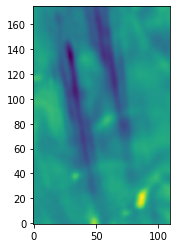

In [759]:
plt.imshow(rot_rbe1[25:,40:150,8],origin='lower')

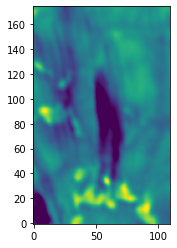

In [793]:
plt.imshow(rot_dre1[25:,50:160,10],origin='lower',vmax=7000,vmin=4500)

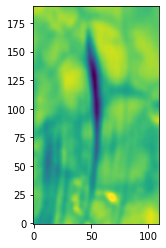

In [849]:
plt.imshow(rot_rre2[10:,40:150,5],origin='lower',vmin=3600,vmax=6400)

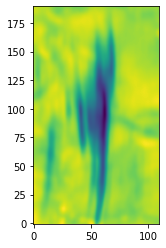

In [871]:
plt.imshow(rot_rbe2[10:,40:150,5],origin='lower')

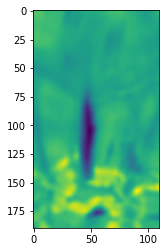

In [874]:
plt.imshow(rot_dre2[10:,40:150,7])

In [880]:
rot_rre2[10:,40:150,:].shape

(190, 110, 9)

In [921]:
rot_rbe2[10:,40:150,:].max()

6968.0

In [922]:
rot_dre2[10:,40:150,:].min()

3237.0

# Plotting: Create a 6 x 3 subplot arrangement. Plot Spicules in each column and show their time evolution along the rows

## Plot 1

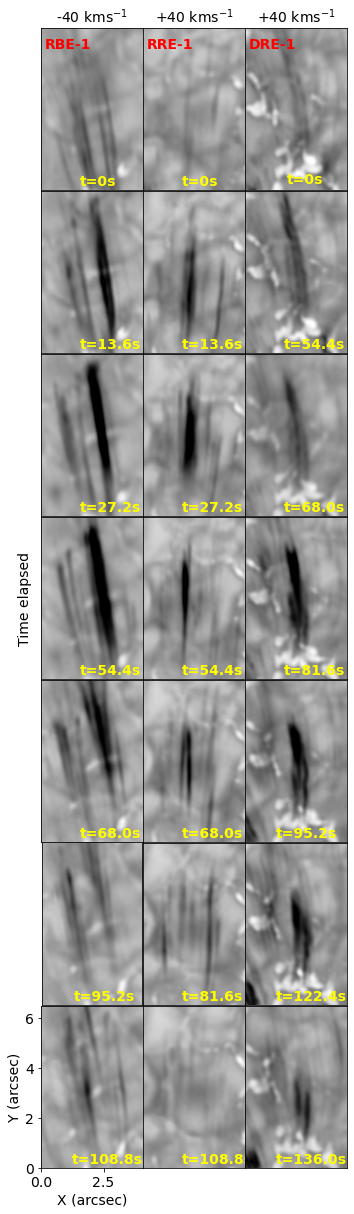

In [918]:
fig, axs =plt.subplots(7,3,figsize=(5,19.8),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0,left=0.05,right=0.9,top=0.9,bottom=0.1)
axs=axs.ravel()
# scans_rbe=[323,324,325,328,329,331]
# scans_rre=[264,265,268,267,269,271]
# scans_dre=[283,285,287,289,292,294]

scans_rbe=[1,2,3,5,6,8,9]
scans_rre=[1,2,3,5,6,7,9]
scans_dre=[1,5,6,7,8,10,11]

axs[0].imshow(rot_rbe1[25:,40:150,scans_rbe[0]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000)
axs[0].text(3.5,153,r'RBE-1',color='red',fontsize=14,weight ='bold')
axs[0].text(41,5,r't=0s',color='yellow',fontsize=14,weight='bold')
axs[1].imshow(rot_rre1[25:,45:155,scans_rre[0]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[1].text(41,5,r't=0s',color='yellow',fontsize=14,weight='bold')
axs[1].text(3.5,153,r'RRE-1',color='red',fontsize=14,weight ='bold')
axs[2].imshow(rot_dre1[25:,50:160,scans_dre[0]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[2].text(3.5,153,r'DRE-1',color='red',fontsize=14,weight ='bold')
axs[2].text(45,7,r't=0s',color='yellow',fontsize=14,weight='bold')
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[0].set_title(r'-40 kms$^{-1}$',size=14)
axs[1].set_title(r'+40 kms$^{-1}$',size=14)
axs[2].set_title(r'+40 kms$^{-1}$',size=14)

axs[3].imshow(rot_rbe1[25:,40:150,scans_rbe[1]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000)
axs[3].text(41,5,r't='+str(13.6*(scans_rbe[1]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[4].imshow(rot_rre1[25:,45:155,scans_rre[1]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[4].text(41,5,r't='+str(13.6*(scans_rre[1]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[5].imshow(rot_dre1[25:,50:160,scans_dre[1]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[5].text(41,5,r't='+str(13.6*(scans_dre[1]-scans_dre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[3].set_yticks([])
axs[3].set_xticks([])
axs[4].set_xticks([])
axs[4].set_yticks([])
axs[5].set_xticks([])
axs[5].set_yticks([])

axs[6].imshow(rot_rbe1[25:,40:150,scans_rbe[2]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000)
axs[6].text(41,5,r't='+str(13.6*(scans_rbe[2]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[7].imshow(rot_rre1[25:,45:155,scans_rre[2]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[7].text(41,5,r't='+str(13.6*(scans_rre[2]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[8].imshow(rot_dre1[25:,50:160,scans_dre[2]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[8].text(41,5,r't='+str(13.6*(scans_dre[2]-scans_dre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[6].set_yticks([])
axs[6].set_xticks([])
axs[7].set_xticks([])
axs[7].set_yticks([])
axs[8].set_xticks([])
axs[8].set_yticks([])

axs[9].imshow(rot_rbe1[25:,40:150,scans_rbe[3]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000)
axs[9].text(41,5,r't='+str(13.6*(scans_rbe[3]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[10].imshow(rot_rre1[25:,45:155,scans_rre[3]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[10].text(41,5,r't='+str(13.6*(scans_rre[3]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[11].imshow(rot_dre1[25:,50:160,scans_dre[3]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[11].text(41,5,r't='+str(13.6*(scans_dre[3]-scans_dre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[9].set_yticks([])
axs[9].set_xticks([])
axs[10].set_xticks([])
axs[10].set_yticks([])
axs[11].set_xticks([])
axs[11].set_yticks([])

axs[12].imshow(rot_rbe1[25:,40:150,scans_rbe[4]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000)
axs[12].text(41,5,r't='+str(13.6*(scans_rbe[4]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[13].imshow(rot_rre1[25:,45:155,scans_rre[4]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[13].text(41,5,r't='+str(13.6*(scans_rre[4]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[14].imshow(rot_dre1[25:,50:160,scans_dre[4]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[14].text(33,5,r't='+str(np.round_(13.6*(scans_dre[4]-scans_dre[0]),decimals=1))+'s',color='yellow',fontsize=14,weight='bold')
axs[12].set_yticks([])
axs[12].set_xticks([])
axs[13].set_xticks([])
axs[13].set_yticks([])
axs[14].set_xticks([])
axs[14].set_yticks([])

axs[15].imshow(rot_rbe1[25:,40:150,scans_rbe[5]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000,extent =[0,105*0.0371,0,170*0.0371])
axs[15].text(33*0.0371,5*0.0371,r't='+str(13.6*(scans_rbe[5]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[16].imshow(rot_rre1[25:,45:155,scans_rre[5]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[16].text(41,5,r't='+str(13.6*(scans_rre[5]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[17].imshow(rot_dre1[25:,50:160,scans_dre[5]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[17].text(33,5,r't='+str(np.round_(13.6*(scans_dre[5]-scans_dre[0]),decimals=1))+'s',color='yellow',fontsize=14,weight='bold')
# axs[15].set_ylabel('Y (arcsec)',size=14)
# axs[15].set_xlabel('X (arcsec)',size=14)
#axs[15].tick_params(axis='both', which='major', labelsize=14)
axs[15].set_yticks([])
axs[15].set_xticks([])
axs[16].set_xticks([])
axs[16].set_yticks([])
axs[17].set_xticks([])
axs[17].set_yticks([])

axs[18].imshow(rot_rbe1[25:,40:150,scans_rbe[6]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7000,extent =[0,110*0.0371,0,175*0.0371])
axs[18].text(33*0.0371,5*0.0371,r't='+str(13.6*(scans_rbe[6]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[19].imshow(rot_rre1[25:,45:155,scans_rre[6]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[19].text(41,5,r't='+str(13.6*(scans_rre[6]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[20].imshow(rot_dre1[25:,50:160,scans_dre[6]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7300)
axs[20].text(33,5,r't='+str(np.round_(13.6*(scans_dre[6]-scans_dre[0]),decimals=1))+'s',color='yellow',fontsize=14,weight='bold')
axs[18].set_ylabel('Y (arcsec)',size=14)
axs[18].set_xlabel('X (arcsec)',size=14)
axs[18].tick_params(axis='both', which='major', labelsize=14)
axs[19].set_xticks([])
axs[19].set_yticks([])
axs[20].set_xticks([])
axs[20].set_yticks([])


fig.text(0.005, 0.5, 'Time elapsed', ha='center', va='center', rotation='vertical',size=14)
plt.savefig('/mn/stornext/d9/souvikb/paper4_images/RREs_DREs_RBEs_revised-1.pdf',dpi=300,format='pdf',bbox_inches = 'tight',pad_innches=0.1)

## Plot 2

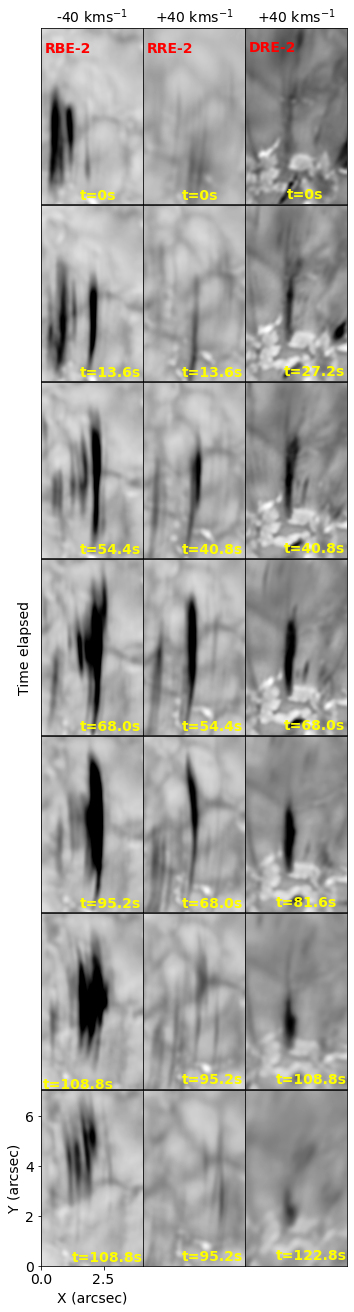

In [933]:
fig, axs =plt.subplots(7,3,figsize=(5,21.5),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0,left=0.05,right=0.9,top=0.9,bottom=0.1)
axs=axs.ravel()
scans_rbe2=[0,1,4,5,7,8,9]
scans_rre2=[0,1,3,4,5,7,8]
scans_dre2=[0,2,3,5,6,8,9]

axs[0].imshow(rot_rbe2[10:,40:150,scans_rbe2[0]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800)
axs[0].text(3.5,163,r'RBE-2',color='red',fontsize=14,weight ='bold')
axs[0].text(41,5,r't=0s',color='yellow',fontsize=14,weight='bold')
axs[1].imshow(rot_rre2[10:,40:150,scans_rre2[0]],origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)
axs[1].text(41,5,r't=0s',color='yellow',fontsize=14,weight='bold')
axs[1].text(3.5,163,r'RRE-2',color='red',fontsize=14,weight ='bold')
axs[2].imshow(rot_dre2[10:,40:150,scans_dre2[0]],cmap='gray',vmin=4000,vmax=7500)
axs[2].text(3.5,25,r'DRE-2',color='red',fontsize=14,weight ='bold')
axs[2].text(45,183,r't=0s',color='yellow',fontsize=14,weight='bold')
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[0].set_title(r'-40 kms$^{-1}$',size=14)
axs[1].set_title(r'+40 kms$^{-1}$',size=14)
axs[2].set_title(r'+40 kms$^{-1}$',size=14)

axs[3].imshow(rot_rbe2[10:,40:150,scans_rbe2[1]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800)
axs[3].text(41,5,r't='+str(13.6*(scans_rbe2[1]-scans_rbe2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[4].imshow(rot_rre2[10:,40:150,scans_rre2[1]],origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)
axs[4].text(41,5,r't='+str(13.6*(scans_rre2[1]-scans_rre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[5].imshow(rot_dre2[10:,40:150,scans_dre2[1]],cmap='Greys_r',vmin=4000,vmax=7500)
axs[5].text(41,183,r't='+str(13.6*(scans_dre2[1]-scans_dre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[3].set_yticks([])
axs[3].set_xticks([])
axs[4].set_xticks([])
axs[4].set_yticks([])
axs[5].set_xticks([])
axs[5].set_yticks([])

axs[6].imshow(rot_rbe2[10:,40:150,scans_rbe2[2]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800)
axs[6].text(41,5,r't='+str(13.6*(scans_rbe2[2]-scans_rbe2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[7].imshow(rot_rre2[10:,40:150,scans_rre2[2]],origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)
axs[7].text(41,5,r't='+str(13.6*(scans_rre2[2]-scans_rre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[8].imshow(rot_dre2[10:,40:150,scans_dre2[2]],cmap='Greys_r',vmin=4000,vmax=7500)
axs[8].text(41,183,r't='+str(13.6*(scans_dre2[2]-scans_dre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[6].set_yticks([])
axs[6].set_xticks([])
axs[7].set_xticks([])
axs[7].set_yticks([])
axs[8].set_xticks([])
axs[8].set_yticks([])

axs[9].imshow(rot_rbe2[10:,40:150,scans_rbe2[3]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800)
axs[9].text(41,5,r't='+str(13.6*(scans_rbe2[3]-scans_rbe2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[10].imshow(rot_rre2[10:,40:150,scans_rre2[3]],origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)
axs[10].text(41,5,r't='+str(13.6*(scans_rre2[3]-scans_rre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[11].imshow(rot_dre2[10:,40:150,scans_dre2[3]],cmap='Greys_r',vmin=4000,vmax=7500)
axs[11].text(41,183,r't='+str(13.6*(scans_dre2[3]-scans_dre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[9].set_yticks([])
axs[9].set_xticks([])
axs[10].set_xticks([])
axs[10].set_yticks([])
axs[11].set_xticks([])
axs[11].set_yticks([])

axs[12].imshow(rot_rbe2[10:,40:150,scans_rbe2[4]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800)
axs[12].text(41,5,r't='+str(13.6*(scans_rbe2[4]-scans_rbe2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[13].imshow(rot_rre2[10:,40:150,scans_rre2[4]],origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)
axs[13].text(41,5,r't='+str(13.6*(scans_rre2[4]-scans_rre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[14].imshow(rot_dre2[10:,40:150,scans_dre2[4]],cmap='Greys_r',vmin=4000,vmax=7500)
axs[14].text(33,183,r't='+str(np.round_(13.6*(scans_dre2[4]-scans_dre2[0]),decimals=1))+'s',color='yellow',fontsize=14,weight='bold')
axs[12].set_yticks([])
axs[12].set_xticks([])
axs[13].set_xticks([])
axs[13].set_yticks([])
axs[14].set_xticks([])
axs[14].set_yticks([])

axs[15].imshow(rot_rbe2[10:,40:150,scans_rbe2[5]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800)
axs[15].text(33*0.0371,5*0.0371,r't='+str(13.6*(scans_rbe2[5]-scans_rbe2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[16].imshow(rot_rre2[10:,40:150,scans_rre2[5]],origin='lower',cmap='Greys_r',vmin=3900,vmax=7000)
axs[16].text(41,5,r't='+str(13.6*(scans_rre2[5]-scans_rre2[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[17].imshow(rot_dre2[10:,40:150,scans_dre2[5]],cmap='Greys_r',vmin=4000,vmax=7500)
axs[17].text(33,183,r't='+str(np.round_(13.6*(scans_dre2[5]-scans_dre2[0]),decimals=1))+'s',color='yellow',fontsize=14,weight='bold')
# axs[15].set_ylabel('Y (arcsec)',size=14)
# axs[15].set_xlabel('X (arcsec)',size=14)
# axs[15].tick_params(axis='both', which='major', labelsize=14)
axs[15].set_xticks([])
axs[15].set_yticks([])
axs[16].set_xticks([])
axs[16].set_yticks([])
axs[17].set_xticks([])
axs[17].set_yticks([])

axs[18].imshow(rot_rbe2[10:,40:150,scans_rbe2[6]],origin='lower',cmap='Greys_r',vmin=4000,vmax=6800,extent =[0,110*0.0371,0,190*0.0371])
axs[18].text(33*0.0371,5*0.0371,r't='+str(13.6*(scans_rbe2[6]-scans_rbe[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[19].imshow(rot_rre2[10:,40:150,scans_rre2[6]],origin='lower',cmap='Greys_r',vmin=4000,vmax=7100)
axs[19].text(41,5,r't='+str(13.6*(scans_rre2[6]-scans_rre[0]))+'s',color='yellow',fontsize=14,weight='bold')
axs[20].imshow(rot_dre2[10:,40:150,scans_dre2[6]],cmap='Greys_r',vmin=4000,vmax=7500)
axs[20].text(33,183,r't='+str(np.round_(13.6*(scans_dre2[6]-scans_dre[0]),decimals=1)+np.round(13.6))+'s',color='yellow',fontsize=14,weight='bold')
axs[18].set_ylabel('Y (arcsec)',size=14)
axs[18].set_xlabel('X (arcsec)',size=14)
axs[18].tick_params(axis='both', which='major', labelsize=14)
axs[19].set_xticks([])
axs[19].set_yticks([])
axs[20].set_xticks([])
axs[20].set_yticks([])


fig.text(0.005, 0.5, 'Time elapsed', ha='center', va='center', rotation='vertical',size=14)
plt.savefig('/mn/stornext/d9/souvikb/paper4_images/RREs_DREs_RBEs_revised-2.pdf',dpi=300,format='pdf',bbox_inches = 'tight',pad_innches=0.1)

# x-t plot

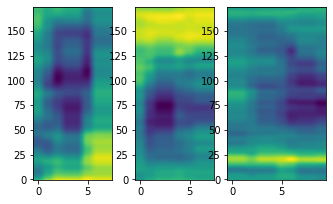

In [935]:
fig, axs =plt.subplots(1,3,figsize=(5,3),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0,left=0.05,right=0.9,top=0.9,bottom=0.1)
axs=axs.ravel()

x_t1=np.mean(rot_rbe1[25:,40:150,scans_rbe[0]:scans_rbe[-1]],axis=1)
x_t2=np.mean(rot_rre1[25:,45:155,scans_rre[0]:scans_rre[-1]],axis=1)
x_t3=np.mean(rot_dre1[25:,50:160,scans_dre[0]:scans_dre[-1]],axis=1)
axs[0].imshow(x_t1,origin='lower',aspect=0.1)
axs[1].imshow(x_t2,origin='lower',aspect=0.1)      
axs[2].imshow(x_t3,origin='lower',aspect=0.1)

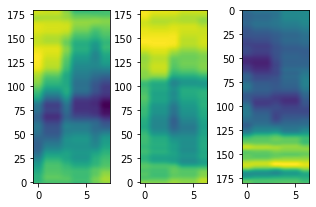

In [953]:
fig, axs =plt.subplots(1,3,figsize=(5,3),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0,left=0.05,right=0.9,top=0.9,bottom=0.1)
axs=axs.ravel()
x_t4=np.mean(rot_rbe2[20:,40:150,scans_rbe2[1]:scans_rbe2[-1]],axis=1)
x_t5=np.mean(rot_rre2[20:,40:150,scans_rre2[1]:scans_rre2[-1]],axis=1)
x_t6=np.mean(rot_dre2[20:,40:150,scans_dre2[1]:scans_dre2[-1]],axis=1)
axs[0].imshow(x_t4,origin='lower',aspect=0.1)
axs[1].imshow(x_t5,origin='lower',aspect=0.1,vmin=5000)      
axs[2].imshow(x_t6,aspect=0.1,vmin=5300)

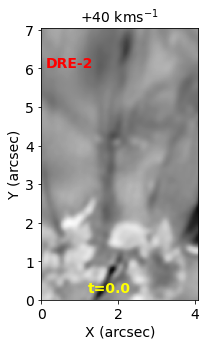

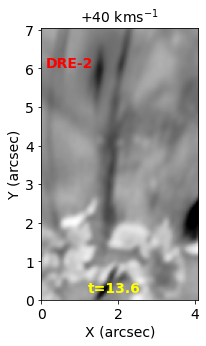

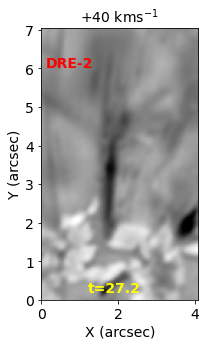

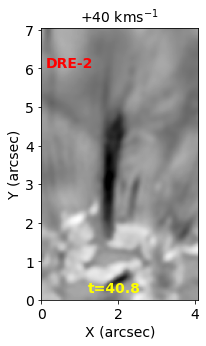

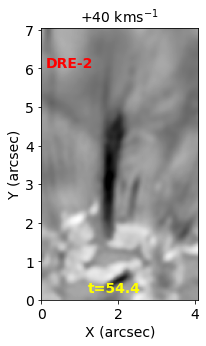

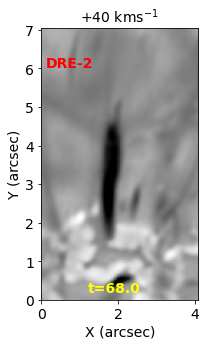

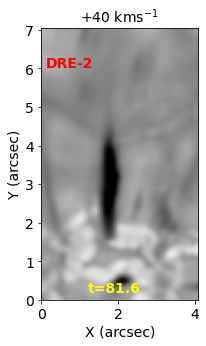

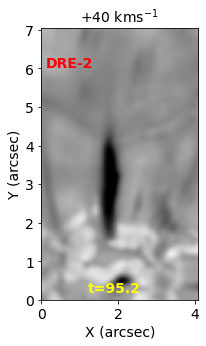

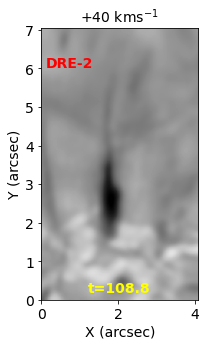

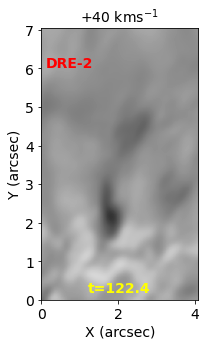

In [972]:
rot_dre2[10:,40:150,:].shape # only for the DRE-2, I am not keeping the origin='lower' keyword
for scans in range(10):
    plt.figure(figsize=(5,5))
    plt.imshow(rot_dre2[10:,40:150,scans],cmap='Greys_r',vmin=4000,vmax=7500,extent =[0,110*0.0371,0,190*0.0371])
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.text(3.5*0.037,163*0.037,r'DRE-2',color='red',fontsize=14,weight ='bold')
    plt.text(33*0.0371,5*0.0371,r't='+str(np.round_(scans*13.6,decimals=1)),color='yellow',fontsize=14,weight='bold')
    plt.ylabel('Y (arcsec)',size=14)
    plt.xlabel('X (arcsec)',size=14)
    plt.title(r'+40 kms$^{-1}$',size=14)
    plt.savefig('/mn/stornext/d9/souvikb/paper4_images/DRE_movie/DRE-'+str(scans)+'.png',dpi=400,format='png',bbox_inches = 'tight',pad_innches=0.1)
    plt.show()